# 第三章 常用函数

### 1.读写文件

In [6]:
import numpy as np
import datetime
import time
import sys
import matplotlib.pyplot as plt

In [7]:
#作为文件读写示例，我们创建一个单位矩阵并将其存储到文件中，并按照如下步骤完成。
#(1) 单位矩阵，即主对角线上的元素均为1，其余元素均为0的正方形矩阵。在NumPy中可以
#用 eye 函数创建一个这样的二维数组，我们只需要给定一个参数，用于指定矩阵中1的元素个数。
i2=np.eye(2)
#(2)使用 savetxt 函数将数据存储到文件中.
np.savetxt('data/eye.txt',i2)

### 2.读入 CSV 文件

In [8]:
#CSV（Comma-Separated Value，逗号分隔值）格式是一种常见的文件格式。
#NumPy中的 loadtxt 函数可以方便地读取CSV文件，自动切分字段，并将数据载入NumPy数组

In [9]:
#下面，我们以载入苹果公司的历史股价数据为
#例展开叙述。股价数据存储在CSV文件中，第一列为股票代码以标识股票（苹果公司股票代码为
#AAPL ），第二列为dd-mm-yyyy格式的日期，第三列为空，随后各列依次是开盘价、最高价、最低
#价和收盘价，最后一列为当日的成交量。

In [10]:
#下面为一行数据：
#股票代码,日期,' ',开盘价,最高价,最低价,收盘价,成交量
#AAPL,28-01-2011, ,344.17,344.4,333.53,336.1,21144800

In [11]:
#从现在开始，我们只关注股票的收盘价和成交量。
#我们将收盘价和成交量分别载入到两个数组中，如下所示：

In [12]:
#usecols 的参数为一个元组，以获取第7字段至第8字段的数据，也就是股票的收盘价和成交量数据。
# unpack 参数设置为 True ，意思是分拆存储不同列的数据，
#即分别将收盘价和成交量的数组赋值给变量 c 和 v 。
#用 delimiter 参数指定了文件中的分隔符为英文逗号
c,v=np.loadtxt('data/data.csv', delimiter=',', usecols=(6,7), unpack=True)

In [13]:
c[:10]

array([336.1 , 339.32, 345.03, 344.32, 343.44, 346.5 , 351.88, 355.2 ,
       358.16, 354.54])

In [14]:
v[:10]

array([21144800., 13473000., 15236800.,  9242600., 14064100., 11494200.,
       17322100., 13608500., 17240800., 33162400.])

### 3.成交量加权平均价格（VWAP）

In [15]:
#VWAP（Volume-Weighted Average Price，成交量加权平均价格）是一个非常重要的经济学量，
#它代表着金融资产的“平均”价格。某个价格的成交量越高，该价格所占的权重就越大。VWAP
#就是以成交量为权重计算出来的加权平均值，常用于算法交易。

In [16]:
#计算成交量加权平均价格
vwap=np.average(c,weights=v)
print("vwap=",vwap)

vwap= 350.5895493532009


In [17]:
#算术平均值函数
print(np.mean(c))

351.0376666666667


In [25]:
#时间加权平均价格
#在经济学中，TWAP（Time-Weighted Average Price，时间加权平均价格）是另一种“平均”
#价格的指标。既然我们已经计算了VWAP，那也来计算一下TWAP吧。其实TWAP只是一个变种
#而已，基本的思想就是最近的价格重要性大一些，所以我们应该对近期的价格给以较高的权重。
#最简单的方法就是用 arange 函数创建一个从0开始依次增长的自然数序列，自然数的个数即为收
#盘价的个数。当然，这并不一定是正确的计算TWAP的方式。

In [26]:
t=np.arange(len(c))
print(np.average(c,weights=t))

352.4283218390804


In [28]:
#取值范围
#找到最大值和最小值
h,l=np.loadtxt('data/data.csv',delimiter=',', usecols=(4,5), unpack=True)
#最大值和最小值
print("highest",np.max(h))
print("lowest",np.min(l))

highest 364.9
lowest 333.53


In [31]:
#NumPy中有一个 ptp 函数可以计算数组的取值范围。该函数返回的是数组元素的最大值
#和最小值之间的差值。也就是说，返回值等于max(array) - min(array)。
#ptp()函数返回最大值和最小值之间的差值,称为极差
#返回值等于max(array) - min(array)
print(np.ptp(h))
print(np.ptp(l))
print (np.max(h) + np.min(l)/2)

24.859999999999957
26.970000000000027
531.665


### 4.统计分析

In [32]:
#股票交易者对于收盘价的预测很感兴趣。常识告诉我们，这个价格应该接近于某种均值。算
#数平均值和加权平均值都是在数值分布中寻找中心点的方法。然而，它们对于异常值（outlier）
#既不鲁棒也不敏感。

In [33]:
#简单统计分析
#我们可以用一些阈值来除去异常值，但其实有更好的方法，那就是中位数。将各个变量值按
#大小顺序排列起来，形成一个数列，居于数列中间位置的那个数即为中位数。

In [36]:
#一个叫做 median 的函数将帮助我们找到中位数
c=np.loadtxt('data/data.csv', delimiter=',', usecols=(6,), unpack=True)
print("median =", np.median(c))

median = 352.055


In [37]:
sorted_close = np.msort(c)
print("sorted =", sorted_close)

sorted = [336.1  338.61 339.32 342.62 342.88 343.44 344.32 345.03 346.5  346.67
 348.16 349.31 350.56 351.88 351.99 352.12 352.47 353.21 354.54 355.2
 355.36 355.76 356.85 358.16 358.3  359.18 359.56 359.9  360.   363.13]


In [39]:
N = len(c)
print("middle =",sorted_close[int((N - 1)/2)])

middle = 351.99


In [43]:
#对于长度为偶数的数组，中位数的值应该等于中间那两个数的平均值。
print("average middle =", (sorted_close[int(N /2)] + sorted_close[int((N -1) / 2)])/2)

average middle = 352.055


In [45]:
#另外一个我们关心的统计量就是方差。方差能够体现变量变化的程度
print("variance =", np.var(c))

variance = 50.126517888888884


In [46]:
#方差是指各个数据与所有数据算术平均数的离差平方和除以数据个数所得到的值。
print(np.mean((c - c.mean())**2))

50.126517888888884


In [47]:
#总体方差是用数据个数去除离差平方和，而样本方差则是用样本数据
#个数减1去除离差平方和，其中样本数据个数减1（即n-1）称为自由度。之所以有这样的差别，是为了保证样本
#方差是一个无偏估计量。

### 5.股票收益率

In [53]:
#在学术文献中，收盘价的分析常常是基于股票收益率和对数收益率的。简单收益率是指相邻
#两个价格之间的变化率，而对数收益率是指所有价格取对数后两两之间的差值。

In [57]:
#NumPy中的 diff 函数可以返回一个由相邻数组元素的差值构成的数组
#不过这里要注意， diff 返回的数组比收盘价数组少一个元素。
#股票收益率
returns = np.diff(c) /c[ : -1]
print("Standard deviation =", np.std(returns))

Standard deviation = 0.012922134436826306


In [59]:
#我们先用 log 函数得到每一个收盘价的对数，再对结果使用 diff 函数即可。
logreturns = np.diff(np.log(c))
print("logreturns",logreturns)

logreturns [ 0.00953488  0.01668775 -0.00205991 -0.00255903  0.00887039  0.01540739
  0.0093908   0.0082988  -0.01015864  0.00649435  0.00650813  0.00200256
  0.00893468 -0.01339027 -0.02183875 -0.03468287  0.01177296  0.00075857
  0.01528161  0.01440064 -0.011103    0.00801225  0.02090904  0.00122297
 -0.01297267  0.00112499 -0.00929083 -0.01659219  0.01522945]


In [60]:
#一般情况下，我们应检查输入数组以确保其不含有零和负数。否则，将得到一个错误提示。
#不过在我们的例子中，股价总为正值，所以可以将检查省略掉。

In [61]:
#我们很可能对哪些交易日的收益率为正值非常感兴趣。
#输出该数组中所有正值元素的索引
posretindices = np.where(returns > 0)
print("Indices with positive returns", posretindices)

Indices with positive returns (array([ 0,  1,  4,  5,  6,  7,  9, 10, 11, 12, 16, 17, 18, 19, 21, 22, 23,
       25, 28], dtype=int64),)


In [62]:
returns[posretindices]

array([0.00958048, 0.01682777, 0.00890985, 0.0155267 , 0.00943503,
       0.00833333, 0.00651548, 0.00652935, 0.00200457, 0.00897472,
       0.01184253, 0.00075886, 0.01539897, 0.01450483, 0.00804443,
       0.02112916, 0.00122372, 0.00112562, 0.01534601])

In [63]:
#在投资学中，波动率（volatility）是对价格变动的一种度量。历史波动率可以根据历史价
#格数据计算得出。计算历史波动率（如年波动率或月波动率）时，需要用到对数收益率。年波动
#率等于对数收益率的标准差除以其均值，再除以交易日倒数的平方根，通常交易日取252天。

In [64]:
annual_volatility = np.std(logreturns)/np.mean(logreturns)
annual_volatility = annual_volatility / np.sqrt(1./252.)
print(annual_volatility)

129.27478991115132


In [66]:
#请注意 sqrt 函数中的除法运算。在Python中，整数的除法和浮点数的除法运算机制不同，
#我们必须使用浮点数才能得到正确的结果。与计算年波动率的方法类似，计算月波动率如下：
print( "Monthly volatility", annual_volatility * np.sqrt(1./12.))

Monthly volatility 37.318417377317765


### 6.日期分析

In [67]:
#首先，我们要读入收盘价数据。随后，根据星期几来切分收盘价数据，并分别计算平均价格。
#最后，我们将找出一周中哪一天的平均收盘价最高，哪一天的最低。

In [68]:
#NumPy是面向浮点数运算的，因此需要对日期做一些专门的处理。
def datestr2num(s):
    return datetime.datetime.strptime(s.decode('ascii'),"%d-%m-%Y").date().weekday()

In [74]:
#最后,调用weekday方法返回一个数字。如同你在注释中看到的,这个数字可以是0到6的整数,
#0代表星期一,6代表星期天
#这个参数就是 converters ，它是一本数据列和转换函数之间进行映射的字典。
dates,close=np.loadtxt('data/data.csv', delimiter=',', 
                       usecols=(1,6), converters={1:datestr2num},unpack=True)
print("Dates =", dates,"close=",close)
print(len(dates),len(close))

Dates = [4. 0. 1. 2. 3. 4. 0. 1. 2. 3. 4. 0. 1. 2. 3. 4. 1. 2. 3. 4. 0. 1. 2. 3.
 4. 0. 1. 2. 3. 4.] close= [336.1  339.32 345.03 344.32 343.44 346.5  351.88 355.2  358.16 354.54
 356.85 359.18 359.9  363.13 358.3  350.56 338.61 342.62 342.88 348.16
 353.21 349.31 352.12 359.56 360.   355.36 355.76 352.47 346.67 351.99]
30 30


In [75]:
#我们来创建一个包含5个元素的数组，分别代表一周的5个工作日。数组元素将初始化为0。
averages = np.zeros(5)
#这个数组将用于保存各工作日的平均收盘价。

In [79]:
#take 函数可以按照这些索引值从数组中取出相应的元素
for i in range(5): 
    #dates是一个数组
    #indices也是一个数组
    indices=np.where(dates==i)
    #print(indices)
    #用take函数获取这些索引值相应的元素值
    prices=np.take(close,indices)
    avg=np.mean(prices)
    print("Day",i,"prices",prices,"Average",avg)
    averages[i]=avg

Day 0 prices [[339.32 351.88 359.18 353.21 355.36]] Average 351.7900000000001
Day 1 prices [[345.03 355.2  359.9  338.61 349.31 355.76]] Average 350.63500000000005
Day 2 prices [[344.32 358.16 363.13 342.62 352.12 352.47]] Average 352.1366666666666
Day 3 prices [[343.44 354.54 358.3  342.88 359.56 346.67]] Average 350.8983333333333
Day 4 prices [[336.1  346.5  356.85 350.56 348.16 360.   351.99]] Average 350.0228571428571


In [81]:
#如果你愿意，还可以找出哪个工作日的平均收盘价是最高的，哪个是最低的
top = np.max(averages)
print("Highest average", top)
print("Top day of the week", np.argmax(averages))
bottom = np.min(averages)
print("Lowest average", bottom)
print("Bottom day of the week", np.argmin(averages))

Highest average 352.1366666666666
Top day of the week 2
Lowest average 350.0228571428571
Bottom day of the week 4


### 7.周汇总

In [124]:
#我们来把苹果股票数据按周进行汇总。
#为了简单起见，我们只考虑前三周的数据，这样就避免了节假日造成的数据缺失
dates, open, high, low, close=np.loadtxt('data/data.csv', delimiter=',', usecols=(1, 3, 4, 5, 6), 
                                         converters={1: datestr2num}, unpack=True)
close = close[:16]
dates = dates[:16]

In [125]:
close

array([336.1 , 339.32, 345.03, 344.32, 343.44, 346.5 , 351.88, 355.2 ,
       358.16, 354.54, 356.85, 359.18, 359.9 , 363.13, 358.3 , 350.56])

In [126]:
dates

array([4., 0., 1., 2., 3., 4., 0., 1., 2., 3., 4., 0., 1., 2., 3., 4.])

In [88]:
#首先我们来找到示例数据中的第一个星期一。
print(np.where(dates == 0))

(array([ 1,  6, 11], dtype=int64),)


In [89]:
first_monday = np.ravel(np.where(dates == 0))[0]
print("The first Monday index is", first_monday)

The first Monday index is 1


In [90]:
#下面要做的是找到示例数据的最后一个星期五，方法和找第一个星期一类似
print(np.where(dates == 4))
last_friday = np.ravel(np.where(dates == 4))[-1]
print("The last Friday index is", last_friday)

(array([ 0,  5, 10, 15], dtype=int64),)
The last Friday index is 15


In [92]:
#接下来创建一个数组，用于存储三周内每一天的索引值
weeks_indices = np.arange(first_monday, last_friday + 1)
print("Weeks indices initial", weeks_indices)

Weeks indices initial [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


In [93]:
#按照每个子数组5个元素，用 split 函数切分数组：
weeks_indices = np.split(weeks_indices,3)
print("Weeks indices after split", weeks_indices)

Weeks indices after split [array([1, 2, 3, 4, 5], dtype=int64), array([ 6,  7,  8,  9, 10], dtype=int64), array([11, 12, 13, 14, 15], dtype=int64)]


In [95]:
#在NumPy中，数组的维度也被称作轴。现在我们来熟悉一下 apply_along_axis 函数。
#这个函数会调用另外一个由我们给出的函数，作用于每一个数组元素上。
#在调用apply_along_axis 时提供我们自定义的函数名 summarize ，并指定要作用的轴或维度的编号
#（如取1）、目标数组以及可变数量的 summarize 函数的参数。

In [134]:
#weeks_indices,first_monday, high,low,last_friday
def summarize(weeks_indices, first_monday, high, low, last_friday):
    monday_open = first_monday[weeks_indices[0]]
    print("weeks_indices[0]",weeks_indices[0])
    print("monday_open",monday_open)
    week_high = np.max( np.take(high, weeks_indices) )
    print("week_high",week_high)
    week_low = np.min( np.take(low, weeks_indices) )
    print("week_low",week_low)
    friday_close = last_friday[weeks_indices[-1]]
    print("weeks_indices[-1]",weeks_indices[-1])
    print("friday_close",friday_close)
    print("==========================================================")
    return("APPL", monday_open, week_high, week_low, friday_close)

In [135]:
weeksummary = np.apply_along_axis(summarize, 1, weeks_indices, open, high, low, close)
print ("Week summary", weeksummary)

weeks_indices[0] 1
monday_open 335.8
week_high 346.7
week_low 334.3
weeks_indices[-1] 5
friday_close 346.5
weeks_indices[0] 6
monday_open 347.89
week_high 360.0
week_low 347.64
weeks_indices[-1] 10
friday_close 356.85
weeks_indices[0] 11
monday_open 356.79
week_high 364.9
week_low 349.52
weeks_indices[-1] 15
friday_close 350.56
Week summary [['APPL' '335.8' '346.7' '334.3' '346.5']
 ['APPL' '347.8' '360.0' '347.6' '356.8']
 ['APPL' '356.7' '364.9' '349.5' '350.5']]


In [129]:
#使用NumPy中的 savetxt 函数，将数据保存至文件。使用NumPy中的 savetxt 函数，将数据保存至文件。
np.savetxt("data/weeksummary.csv", weeksummary, delimiter=",", fmt="%s")
#如代码中所示，我们指定了文件名、需要保存的数组名、分隔符（在这个例子中为英文标点
#逗号）以及存储浮点数的格式。

In [136]:
#格式字符串以一个百分号开始。接下来是一个可选的标志字符： - 表示结果左对齐， 0 表示
#左端补0， + 表示输出符号（正号 + 或负号 - ）。第三部分为可选的输出宽度参数，表示输出的
#最小位数。第四部分是精度格式符，以"."开头，后面跟一个表示精度的整数。最后是一个类型指定字
#符，在我们的例子中指定为字符串类型。

c :单个字符<br/>
d 或 i: 十进制有符号整数<br/>
e 或 E :科学记数法表示的浮点数<br/>
f:浮点数<br/>
g 或 G： 自动在 e 、 E 和 f 中选择合适的表示法<br/>
o:八进制有符号整数<br/>
s:字符串<br/>
u:十进制无符号整数<br/>
x 或 X 十六进制无符号整数

### 8.真实波动幅度均值（ATR）

In [138]:
#ATR（Average True Range，真实波动幅度均值）是一个用来衡量股价波动性的技术指标。
#ATR的计算并不是重点，只是作为演示几个NumPy函数的例子，包括 maximum 函数。

In [21]:
#计算真实波动幅度均值
#按照如下步骤计算真实波动幅度均值。
h,l=np.loadtxt('data/data.csv',delimiter=',', usecols=(5,6), unpack=True)
c=np.loadtxt('data/data.csv', delimiter=',', usecols=(7,), unpack=True)
#(1) ATR是基于N个交易日的最高价和最低价进行计算的，通常取最近20个交易日。
h = h[-20:]
l = l[-20:]
print("len(h)", len(h), "len(l)", len(l))
print("Close", c)

len(h) 20 len(l) 20
Close [21144800. 13473000. 15236800.  9242600. 14064100. 11494200. 17322100.
 13608500. 17240800. 33162400. 13127500. 11086200. 10149000. 17184100.
 18949000. 29144500. 31162200. 23994700. 17853500. 13572000. 14395400.
 16290300. 21521000. 17885200. 16188000. 19504300. 12718000. 16192700.
 18138800. 16824200.]


In [22]:
#(2) 我们还需要知道前一个交易日的收盘价。
previousclose = c[-20-1: -1]
print("len(previousclose)", len(previousclose))
print("Previous close", previousclose)

len(previousclose) 20
Previous close [33162400. 13127500. 11086200. 10149000. 17184100. 18949000. 29144500.
 31162200. 23994700. 17853500. 13572000. 14395400. 16290300. 21521000.
 17885200. 16188000. 19504300. 12718000. 16192700. 18138800.]


In [23]:
#对于每一个交易日，计算以下各项。
#h – l 当日股价范围，即当日最高价和最低价之差。
#h – previousclose 当日最高价和前一个交易日收盘价之差。
#previousclose – l 前一个交易日收盘价和当日最低价之差。

In [24]:
#(3) max 函数返回数组中的最大值。基于上面计算的3个数值，我们来计算所谓的真实波动幅
#度，也就是这三者的最大值。现在我们想在一组数组之间按照元素挑选最大值——也就是在所有
#的数组中第一个元素的最大值、第二个元素的最大值等。为此，需要用NumPy中的 maximum 函数，
#而不是 max 函数。
truerange = np.maximum(h - l, h - previousclose, previousclose - l)
print("True range", truerange)

True range [-3.31 -2.47 -2.35 -2.63 -1.78 -1.04 -0.89 -4.01 -4.51 -3.36 -2.09 -1.63
 -3.72 -3.64 -2.25 -4.05 -3.51 -1.87 -1.77 -6.99]


In [30]:
#(4) 创建一个长度为 N 的数组 atr ，并初始化数组元素为0。
N=20
atr = np.zeros(N)

In [31]:
#(5)这个数组的首个元素就是 truerange 数组元素的平均值。
atr[0] = np.mean(truerange)

In [33]:
#用如下公式计算其他元素的值：
#[[N-1]PART+TR]/N
##这里,PATR表示前一个交易日的ATR值,TR即当日的真实波动幅度。
for i in range(1, 20):
    atr[i] = (N - 1) * atr[i - 1] + truerange[i]
    atr[i] /= N
print("ATR", atr)

ATR [-2.8935     -2.872325   -2.84620875 -2.83539831 -2.7826284  -2.69549698
 -2.60522213 -2.67546102 -2.76718797 -2.79682857 -2.76148714 -2.70491279
 -2.75566715 -2.79988379 -2.7723896  -2.83627012 -2.86995661 -2.81995878
 -2.76746084 -2.9785878 ]


### 9.简单移动平均线

numpy.convolve(a, v, mode=‘full’)，这是numpy函数中的卷积函数库<br/>
　　参数：<br/>
　　　　a:(N,)输入的一维数组<br/>
　　　　b:(M,)输入的第二个一维数组<br/>
　　　　mode:{‘full’, ‘valid’, ‘same’}参数可选<br/>
　　　　　　‘full’　默认值，返回每一个卷积值，长度是N+M-1,在卷积的边缘处，信号不重叠，存在边际效应。<br/>
　　　　　　‘same’　返回的数组长度为max(M, N),边际效应依旧存在。<br/>
　　　　　　‘valid’ 　返回的数组长度为max(M,N)-min(M,N)+1,此时返回的是完全重叠的点。边缘的点无效。<br/>

In [34]:
np.convolve([1, 2, 3], [0, 1, 0.5])

array([0. , 1. , 2.5, 4. , 1.5])

In [35]:
np.convolve([1,2,3],[0,1,0.5], 'same')

array([1. , 2.5, 4. ])

In [36]:
np.convolve([1,2,3],[0,1,0.5], 'valid')

array([2.5])

In [37]:
#简单移动平均线（simple moving average）通常用于分析时间序列上的数据。为了计算它，
#我们需要定义一个N个周期的移动窗口，在我们的例子中即N个交易日。我们按照时间序列滑动
#这个窗口，并计算窗口内数据的均值。

In [41]:
#计算简单移动平均线
#移动平均线只需要少量的循环和均值函数即可计算得出，但使用NumPy还有更优的选
#择—— convolve 函数。简单移动平均线只不过是计算与等权重的指示函数的卷积，当然，也可
#以是不等权重的。
#卷积是分析数学中一种重要的运算，定义为一个函数与经过翻转和平移的另一个函数的乘积的积分。

In [42]:
#按照如下步骤计算简单移动平均线。

In [54]:
#(1) 使用 ones 函数创建一个长度为 N 的元素均初始化为1的数组，然后对整个数组除以 N ，即
#可得到权重。如下所示：
N = 5
weights = np.ones(N) / N
print("Weights", weights)

Weights [0.2 0.2 0.2 0.2 0.2]


In [59]:
#(2) 使用这些权重值，调用 convolve 函数：
#6为最低价
c = np.loadtxt('data/data.csv', delimiter=',', usecols=(6,), unpack=True)
print(len(c))
#34-8=26
sma = np.convolve(weights, c)[N-1:-N+1]
print(len(sma))
sma

30
26


array([341.642, 343.722, 346.234, 348.268, 351.036, 353.256, 355.326,
       356.786, 357.726, 358.72 , 359.472, 358.214, 354.1  , 350.644,
       346.594, 344.566, 345.096, 347.236, 349.136, 352.472, 354.84 ,
       355.27 , 356.56 , 356.63 , 354.052, 352.45 ])

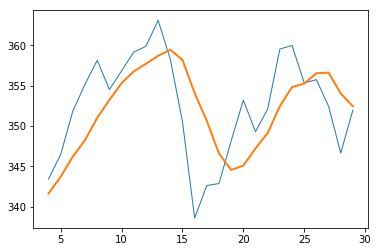

In [60]:
t = np.arange(N-1, len(c))
plt.plot(t,c[N-1:], lw=1.0)
plt.plot(t,sma, lw=2.0)
plt.show()

### 10.指数移动平均线

In [177]:
#除了简单移动平均线，指数移动平均线（exponential moving average）也是一种流行的技术
#指标。指数移动平均线使用的权重是指数衰减的。对历史上的数据点赋予的权重以指数速度减小，
#但永远不会到达0。我们将在计算权重的过程中学习 exp 和 linspace 函数。

In [61]:
#给定一个数组， exp 函数可以计算出每个数组元素的指数
x = np.arange(5)
print("Exp", np.exp(x))

Exp [ 1.          2.71828183  7.3890561  20.08553692 54.59815003]


In [62]:
#linspace 函数需要一个起始值和一个终止值参数，以及可选的元素个数的参数，它将返回
#一个元素值在指定的范围内均匀分布的数组。
print("Linspace", np.linspace(-1, 0, 5))

Linspace [-1.   -0.75 -0.5  -0.25  0.  ]


Weights [0.11405072 0.14644403 0.18803785 0.24144538 0.31002201]


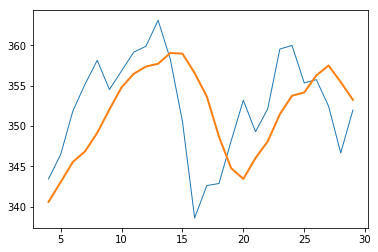

In [65]:
#下面我们来对示例数据计算指数移动平均线。
#(1) 还是回到权重的计算——这次使用 exp 和 linspace 函数。
N = int(5)
weights = np.exp(np.linspace(-1. , 0. , N))
#(2) 对权重值做归一化处理。我们将用到 ndarray 对象的 sum 方法。
weights /= weights.sum()
print("Weights", weights)
#在N = 5时，我们得到的权重值如下：
##6为最低价
c = np.loadtxt('data/data.csv', delimiter=',', usecols=(6,), unpack=True)
ema = np.convolve(weights, c)[N-1:-N+1]
#(3) 接下来就很容易了，我们只需要使用在简单移动平均线一节中学习到的 convolve 函数即
#可。同样，我们还是将结果绘制出来。
t = np.arange(N - 1, len(c))
plt.plot(t, c[N-1:], lw=1.0)
plt.plot(t, ema, lw=2.0)
plt.show()

### 11.布林带

In [66]:
#布林带（Bollinger band）又是一种技术指标。是的，股票市场的确有成千上万种技术指标。
#布林带是以发明者约翰·布林格（John Bollinger）的名字命名的，用以刻画价格波动的区间。布
#林带的基本型态是由三条轨道线组成的带状通道（中轨和上、下轨各一条）。

In [67]:
#中轨 简单移动平均线。
#上轨 比简单移动平均线高两倍标准差的距离。这里的标准差是指计算简单移动平均线所用数据的
#标准差。
#下轨 比简单移动平均线低两倍标准差的距离。

In [190]:
#绘制布林带
#接下来的例子将介绍NumPy中的 fill 函数。 fill 函数可以将数组元素的值全部设置为一个指定
#的标量值，它的执行速度比使用 array.flat = scalar 或者用循环遍历数组赋值的方法更快。
#按照如下步骤绘制布林带。

30
5
26 26
[329.23044409 335.70890572 318.53386282 321.90858271 327.74175968
 331.5628136  337.94259734 343.84172744 339.99900409 336.58687297
 333.15550418 328.64879207 323.61483771 327.25667796 334.30323599
 335.79295948 326.55905786 324.27329493 325.47601386 332.85867025
 341.63882551 348.75558399 348.48014357 348.01342992 343.56371701
 341.85163786]
[336.1  339.32 345.03 344.32 343.44 346.5  351.88 355.2  358.16 354.54
 356.85 359.18 359.9  363.13 358.3  350.56 338.61 342.62 342.88 348.16
 353.21 349.31 352.12 359.56 360.   355.36]
[354.05355591 351.73509428 373.93413718 374.62741729 374.33024032
 374.9491864  372.70940266 369.73027256 375.45299591 380.85312703
 385.78849582 387.77920793 384.58516229 374.03132204 358.88476401
 353.33904052 363.63294214 370.19870507 372.79598614 372.08532975
 368.04117449 361.78441601 364.63985643 365.24657008 364.54028299
 363.04836214]
Ratio between bands 1.0


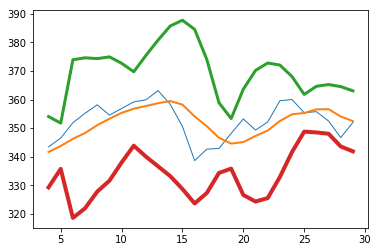

In [68]:
#我们已经有一个名为 sma 的数组，包含了简单移动平均线的数据。因此，我们首先要遍
#历和这些值有关的数据子集。数据子集构建完成后，计算其标准差。注意，从某种意义上来说，
#我们必须去计算每一个数据点与相应平均值之间的差值。如果不使用NumPy，我们只能遍历所有
#的数据点并逐一减去相应的平均值。幸运的是，NumPy中的 fill 函数可以构建元素值完全相同
#的数组。这可以让我们省去一层循环，当然也就省去了这个循环内作差的步骤。
deviation = []
#c为最低价
C = len(c)
print(C)#30
print(N)#5
#(4,30)
for i in range(N - 1, C):
    #4,5,6,.....,24
    #9,10,......,29
    if i + N < C:
        dev = c[i: i + N]
    #25,26,......,29
    else:
        dev = c[-N:]
    averages = np.zeros(N)
    #fill函数填充数据
    #-2,-1,0,......,23
    averages.fill(sma[i - N - 1])
    dev = dev - averages
    dev = dev ** 2
    dev = np.sqrt(np.mean(dev))
    deviation.append(dev)
deviation = 2 * np.array(deviation)
print(len(deviation), len(sma))
upperBB = sma + deviation
lowerBB = sma - deviation
c_slice = c[N-1:]
between_bands = np.where((c_slice < upperBB) & (c_slice > lowerBB))
print(lowerBB[between_bands])
print(c[between_bands])
print(upperBB[between_bands])
between_bands = len(np.ravel(between_bands))
print("Ratio between bands", float(between_bands)/len(c_slice))
#(2) 使用如下代码绘制布林带
t = np.arange(N - 1, C)
plt.plot(t, c_slice, lw=1.0)
plt.plot(t, sma, lw=2.0)
plt.plot(t, upperBB, lw=3.0)
plt.plot(t, lowerBB, lw=4.0)
plt.show()

In [194]:
#NumPy中 fill 函数的用法。该函数可以用一个指定的标量值填充数组，
#而这个标量值也是 fill 函数唯一的参数。

In [195]:
#人们通常将简单移动平均线作为布林带的中轨线。而以指数移动平均线作为中轨线也是一
#种流行的做法，因此我们将它留作练习。

In [69]:
#验证一下 fill 函数的执行速度是否真的比使用 array.flat = scalar 或者用循环遍历
#数组赋值的方法更快。

### 12.线性模型

In [197]:
#NumPy的 linalg 包是专门用于线性代数计算的。下面的工作基于一个假设，
#就是一个价格可以根据N个之前的价格利用线性模型计算得出。

In [198]:
#用线性模型预测价格

In [70]:
#我们姑且假设，一个股价可以用之前股价的线性组合表示出来，也就是说，这个股价等于之
#前的股价与各自的系数相乘后再做加和的结果，这些系数是需要我们来确定的。用线性代数的术
#语来讲，这就是解一个最小二乘法的问题。步骤如下。

In [77]:
##6为最低价
c = np.loadtxt('data/data.csv', delimiter=',', usecols=(6,), unpack=True)
#(1) 首先，获取一个包含N个股价的向量 b 。
b = c[-N:]
print(len(b))
print(b)
b = b[::-1]
print("b", b)

5
[355.36 355.76 352.47 346.67 351.99]
b [351.99 346.67 352.47 355.76 355.36]


In [74]:
#(2) 第二步，初始化一个N×N的二维数组 A ，元素全部为 0 。
A = np.zeros((N, N), float)
print("Zeros N by N", A)

Zeros N by N [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [75]:
#(3) 第三步，用 b 向量中的N个股价值填充数组 A 。
for i in range(N):
    A[i, ] = c[-N - 1 - i: - 1 - i]
print("A", A)

A [[360.   355.36 355.76 352.47 346.67]
 [359.56 360.   355.36 355.76 352.47]
 [352.12 359.56 360.   355.36 355.76]
 [349.31 352.12 359.56 360.   355.36]
 [353.21 349.31 352.12 359.56 360.  ]]


In [97]:
#(4) 我们的目标是确定线性模型中的那些系数，以解决最小平方和的问题。我们使用 linalg
#包中的 lstsq 函数来完成这个任务。
##返回的元组中包含稍后要用到的系数向量 x 、一个残差数组、 A 的秩以及 A 的奇异值。
(x, residuals, rank, s) = np.linalg.lstsq(A, b)
print(x, "=",residuals,"=", rank,"=", s)

[ 0.78111069 -1.44411737  1.63563225 -0.89905126  0.92009049] = [] = 5 = [1.77736601e+03 1.49622969e+01 8.75528492e+00 5.15099261e+00
 1.75199608e+00]


C:\Users\zsx\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


In [ ]:
#(5) 一旦得到了线性模型中的系数，我们就可以预测下一次的股价了。使用NumPy中的 dot
#函数计算系数向量与最近N个价格构成的向量的点积（dot product）。

In [80]:
print(np.dot(b, x))

357.9391610152338


### 13.趋势线

In [206]:
#趋势线，是根据股价走势图上很多所谓的枢轴点绘成的曲线。顾名思义，趋势线描绘的是价
#格变化的趋势。过去的股民们在纸上用手绘制趋势线，而现在我们可以让计算机来帮助我们作图。
#在这一节的教程中，我们将用非常简易的方法来绘制趋势线，可能在实际生活中不是很奏效，但
#这应该能将趋势线的原理阐述清楚。

In [81]:
#绘制趋势线
#按照如下步骤绘制趋势线。
#(1) 首先，我们需要确定枢轴点的位置。
#这里，我们假设它们等于最高价、最低价和收盘价的算术平均值。

In [82]:
#最高价,最低价,收盘价
h, l, c = np.loadtxt('data/data.csv', delimiter=',', usecols=(4, 5, 6), unpack=True)

In [83]:
h

array([344.4 , 340.04, 345.65, 345.25, 344.24, 346.7 , 353.25, 355.52,
       359.  , 360.  , 357.8 , 359.48, 359.97, 364.9 , 360.27, 359.5 ,
       345.4 , 344.64, 345.15, 348.43, 355.05, 355.72, 354.35, 359.79,
       360.29, 361.67, 357.4 , 354.76, 349.77, 352.32])

In [84]:
l

array([333.53, 334.3 , 340.98, 343.55, 338.55, 343.51, 347.64, 352.15,
       354.87, 348.  , 353.54, 356.71, 357.55, 360.5 , 356.52, 349.52,
       337.72, 338.61, 338.37, 344.8 , 351.12, 347.68, 348.4 , 355.92,
       357.75, 351.31, 352.25, 350.6 , 344.9 , 345.  ])

In [85]:
c

array([336.1 , 339.32, 345.03, 344.32, 343.44, 346.5 , 351.88, 355.2 ,
       358.16, 354.54, 356.85, 359.18, 359.9 , 363.13, 358.3 , 350.56,
       338.61, 342.62, 342.88, 348.16, 353.21, 349.31, 352.12, 359.56,
       360.  , 355.36, 355.76, 352.47, 346.67, 351.99])

In [86]:
pivots = (h + l + c ) / 3
print("Pivots", pivots)

Pivots [338.01       337.88666667 343.88666667 344.37333333 342.07666667
 345.57       350.92333333 354.29       357.34333333 354.18
 356.06333333 358.45666667 359.14       362.84333333 358.36333333
 353.19333333 340.57666667 341.95666667 342.13333333 347.13
 353.12666667 350.90333333 351.62333333 358.42333333 359.34666667
 356.11333333 355.13666667 352.61       347.11333333 349.77      ]


In [87]:
#从这些枢轴点出发，我们可以推导出所谓的阻力位和支撑位。阻力位是指股价上升时遇到阻
#力，在转跌前的最高价格；支撑位是指股价下跌时遇到支撑，在反弹前的最低价格。需要提醒的
#是，阻力位和支撑位并非客观存在，它们只是一个估计量。基于这些估计量，我们就可以绘制出
#阻力位和支撑位的趋势线。我们定义当日股价区间为最高价与最低价之差。

In [88]:
#(2) 定义一个函数用直线 y= at + b 来拟合数据，该函数应返回系数 a 和 b 。这里需要再次用
#到 linalg 包中的 lstsq 函数。将直线方程重写为 y = Ax 的形式，其中 A = [t 1] ， x = [a b] 。
#使用 ones_like 和 vstack 函数来构造数组 A 。

In [101]:
def fit_line(t, y):
    A = np.vstack([t, np.ones_like(t)]).T
    print(A.shape)
    print(np.linalg.lstsq(A, y))
    return np.linalg.lstsq(A, y)[0]

In [102]:
#(3) 假设支撑位在枢轴点下方一个当日股价区间的位置，而阻力位在枢轴点上方一个当日股
#价区间的位置，据此拟合支撑位和阻力位的趋势线。

In [104]:
t = np.arange(len(c))
print(t)
sa, sb = fit_line(t, pivots - (h - l))
ra, rb = fit_line(t, pivots + (h - l))
support = sa * t + sb
resistance = ra * t + rb

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
(30, 2)
(array([2.66605117e-01, 3.41391004e+02]), array([1755.96858]), 2, array([92.61284461,  2.80374979]))
(30, 2)
(array([2.90444939e-01, 3.52035993e+02]), array([1149.64982025]), 2, array([92.61284461,  2.80374979]))


C:\Users\zsx\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.
C:\Users\zsx\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """


In [105]:
#(4) 到这里我们已经获得了绘制趋势线所需要的全部数据。但是，我们最好检查一下有多少
#个数据点落在支撑位和阻力位之间。显然，如果只有一小部分数据在这两条趋势线之间，这样的
#设定就没有意义。设置一个判断数据点是否位于趋势线之间的条件，作为 where 函数的参数。

In [107]:
condition = (c > support) & (c < resistance)
print("Condition", condition)
between_bands = np.where(condition)
print("between_bands",between_bands)
#以下是根据条件判断的布尔值：

Condition [False False  True  True  True  True  True False False  True False False
 False False False  True False False False  True  True  True  True False
 False  True  True  True False  True]
between_bands (array([ 2,  3,  4,  5,  6,  9, 15, 19, 20, 21, 22, 25, 26, 27, 29],
      dtype=int64),)


In [108]:
#复查一下具体取值：
print(support[between_bands])
print(c[between_bands])
print (resistance[between_bands])

[341.92421382 342.19081893 342.45742405 342.72402917 342.99063429
 343.79044964 345.39008034 346.4565008  346.72310592 346.98971104
 347.25631615 348.0561315  348.32273662 348.58934174 349.12255197]
[345.03 344.32 343.44 346.5  351.88 354.54 350.56 348.16 353.21 349.31
 352.12 355.36 355.76 352.47 351.99]
[352.61688271 352.90732765 353.19777259 353.48821753 353.77866246
 354.64999728 356.39266691 357.55444667 357.84489161 358.13533655
 358.42578149 359.2971163  359.58756124 359.87800618 360.45889606]


In [109]:
#注意， where 函数返回的是一个秩为2的数组，因此在使用 len 函数之前需要调用 ravel 函数。
between_bands = len(np.ravel(between_bands))
print ("Number points between bands", between_bands)
print ("Ratio between bands", float(between_bands)/len(c))

Number points between bands 15
Ratio between bands 0.5


In [110]:
#我们还得到了一个额外的奖励：一个新的预测模型。我们可以用这个模型来预测下一个交易
#日的阻力位和支撑位。
print( "Tomorrows support", sa * (t[-1] + 1) + sb)
print ("Tomorrows resistance", ra * (t[-1] + 1) + rb)

Tomorrows support 349.38915708812254
Tomorrows resistance 360.7493409961686


In [113]:
#此外，还有另外一种计算支撑位和阻力位之间数据点个数的方法：使用 [] 和 intersect1d
#函数。在 [] 操作符里面定义选取条件，然后用 intersect1d 函数计算两者相交的结果。
a1 = c[c > support]
a2 = c[c < resistance]
print("Number of points between bands 2nd approach" ,len(np. intersect1d(a1, a2)))

Number of points between bands 2nd approach 15


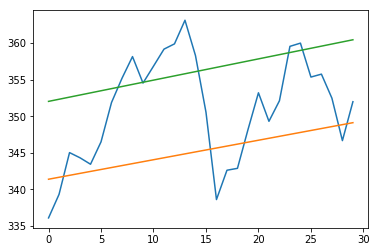

In [115]:
#(5) 我们再次将结果绘制出来，如下所示：
plt.plot(t, c)
plt.plot(t, support)
plt.plot(t, resistance)
plt.show()

In [ ]:
#随后，我们用两种不同的方法分别计算了有多少个数据点落在支撑位和阻力位之间的范围内，
#并得到了一致的结果。
#第一种方法使用 where 函数和一个条件表达式。第二种方法使用 [] 操作符和 intersect1d 函
#数。 intersect1d 函数返回一个由两个数组的所有公共元素构成的数组。

### 14.ndarray 对象的方法

ndarray 对象的方法相当多，我们无法在这里逐一介绍。前面遇到的 var 、 sum 、 std 、 argmax 、
argmin 以及 mean 函数也均为 ndarray 方法。

average:加权平均<br/>
mean:算术平均<br/>
max:最大<br/>
min:最小<br/>
ptp:极差<br/>
median:中位数<br/>
var:方差<br/>
diff:一个由相邻数组元素的差值构成的数组<br/>
std:标准差<br/>
log:去对数<br/>
where:判断，返回的是数组的下标<br/>
sqrt:平方<br/>
take(close,indices)：从close中取出indices下标对应的值<br/>
argmax:返回的是 averages 数组中最大元素的索引值<br/>
argmin:返回的是 averages 数组中最小元素的索引值<br/>
split:分割<br/>
apply_along_axis：<br/>
maximum：<br/>
convolve:<br/>
fill:<br/>
np.linalg.lstsq(A, b):<br/>
np.dot(b, x):<br/>
np. intersect1d<br/>
clip:<br/>
compress:<br/>
prod:<br/>
cumprod:<br/>

### 15.数组的修剪和压缩

In [116]:
#这里给出少量使用 ndarray 方法的例子。按如下步骤对数组进行修剪和压缩操作。
#(1) clip 方法返回一个修剪过的数组，也就是将所有比给定最大值还大的元素全部设为给定
#的最大值，而所有比给定最小值还小的元素全部设为给定的最小值。例如，设定范围1到2对0到4
#的整数数组进行修剪：
a = np.arange(5)
print("a =", a)
print("Clipped", a.clip(1, 2))

a = [0 1 2 3 4]
Clipped [1 1 2 2 2]


In [118]:
#(2) compress 方法返回一个根据给定条件筛选后的数组。例如：
a = np.arange(4)
print( a)
print ("Compressed", a.compress(a > 2))

[0 1 2 3]
Compressed [3]


### 16.阶乘

In [119]:
#ndarray 类有一个 prod 方法，可以计算数组中所有元素的乘积。按如下步骤计算阶乘。
#(1) 计算8的阶乘。为此，先生成一个1~8的整数数组，并调用 prod 方法。
b = np.arange(1, 9)
print("b =", b)
print( "Factorial", b.prod())

b = [1 2 3 4 5 6 7 8]
Factorial 40320


In [120]:
#调用 cumprod 方法，计算数组元素的累积乘积。
print("Factorials", b.cumprod())

Factorials [    1     2     6    24   120   720  5040 40320]
